# Exploratory Data Analysis

## Questions to Solve
* **Course Title**
    - What is the most frequent words in course title?
    - Longest/Shortest course title?
    - How can we build recommendation systems via title using similarity?
    - Most famous courses by number of subscribers?
* **Subjects/Categories**
    - What is the distribution of subjects?
    - How many courses per subject?
    - Distribution of subjects per year?
    - How many people purchase a particular subject?
    - Which subjects is the most popular?
* **Published Year**
    - Number of courses per year?
    - Which year has the highest number of courses?
    - What is the trend of courses per year?
* **Levels**
    - How many levels do we have?
    - What is the distribution of courses per level?
    - Which subject have the highest levels?
    - How many subscribers per level?
    - How many courses per level?
* **Duration of Course**
    - Which courses have the highest duration (paid and free)?
    - Which courses have higher durations?
    - Duration vs number of subscribers?
* **Subscribers**
    - Which course have the highest number of subscribers?
    - Average number of subscribers?
    - Number of subscribers per subject?
    - Number of subscribers per year?
* **Price**
    - What is the average price of a course?
    - What is the minimum and maximum price?
    - How much does Udemy earn?
    - The most profitable courses?
* **Correlation**
    - Does number of subscribers depend on;
        - Number of reviews?
        - Price?
        - Number of lectures?
        - Content duration?
* **Question on Time**
    - Published Year
        - Number of courses per year?
        - Distribution of subjects per year?
        - Which year has the highest number of courses?
        - What is the trend of courses per year?

In [1]:
# Import dependencies
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

%matplotlib inline

In [2]:
# read in / load dataset
df = pd.read_csv("udemy_course_data.csv")

# convert price from Rupee to Dollar
df["price"] = df["price"] * 0.0121

df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,profit,published_date,published_time,year,month,day
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,2.4200,2147,23,51,All Levels,1.5 hours,2017-01-18T20:58:58Z,Business Finance,429400,2017-01-18,20:58:58Z,2017,1,18
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,0.9075,2792,923,274,All Levels,39 hours,2017-03-09T16:34:20Z,Business Finance,209400,2017-03-09,16:34:20Z,2017,3,9
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,0.5445,2174,74,51,Intermediate Level,2.5 hours,2016-12-19T19:26:30Z,Business Finance,97830,2016-12-19,19:26:30Z,2016,12,19
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,1.1495,2451,11,36,All Levels,3 hours,2017-05-30T20:07:24Z,Business Finance,232845,2017-05-30,20:07:24Z,2017,5,30
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,2.4200,1276,45,26,Intermediate Level,2 hours,2016-12-13T14:57:18Z,Business Finance,255200,2016-12-13,14:57:18Z,2016,12,13


In [3]:
# Get info on dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3683 non-null   int64  
 1   course_title         3683 non-null   object 
 2   url                  3683 non-null   object 
 3   is_paid              3683 non-null   bool   
 4   price                3683 non-null   float64
 5   num_subscribers      3683 non-null   int64  
 6   num_reviews          3683 non-null   int64  
 7   num_lectures         3683 non-null   int64  
 8   level                3683 non-null   object 
 9   content_duration     3683 non-null   object 
 10  published_timestamp  3683 non-null   object 
 11  subject              3683 non-null   object 
 12  profit               3683 non-null   int64  
 13  published_date       3683 non-null   object 
 14  published_time       3682 non-null   object 
 15  year                 3683 non-null   i

## EDA on Subject/Category

* **Subjects/Categories**
    - What is the distribution of subjects?
    - How many courses per subject?
    - Distribution of subjects per year?
    - How many people purchase a particular subject?
    - Which subjects is the most popular?
    
**What is the distribution of subjects?**    

In [4]:
len(df["course_title"].unique())

3668

There are 3683 unique number of courses in the dataset.

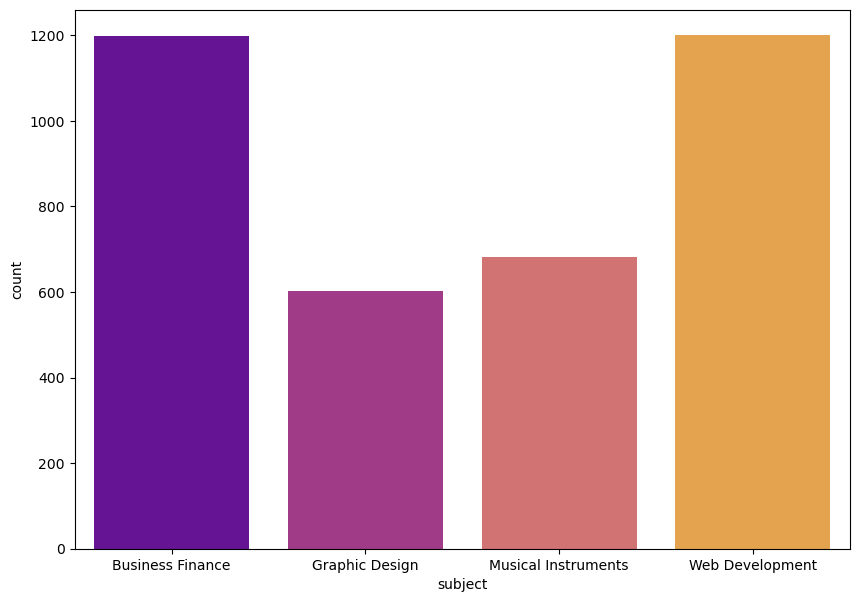

In [5]:
# Plot he grap of subject/category of courses
plt.figure(figsize=(10, 7))
sns.countplot(x="subject", data=df, palette="plasma");

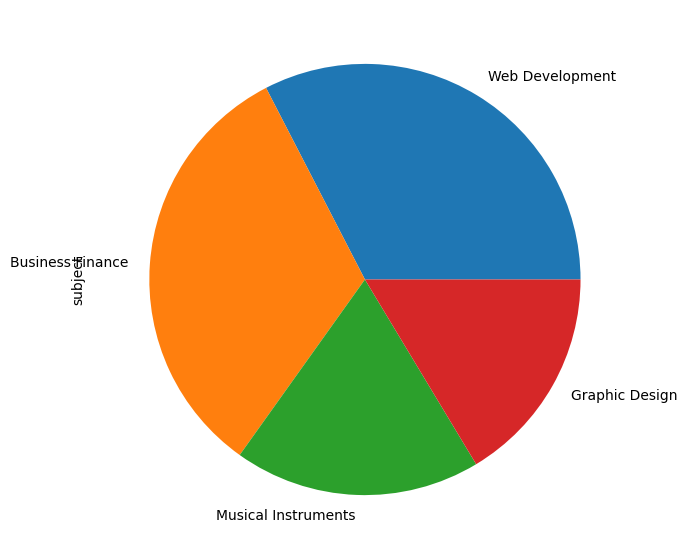

In [6]:
# plot a piechat of the "subject" column
plt.figure(figsize=(10, 7))
df["subject"].value_counts().plot(kind="pie");

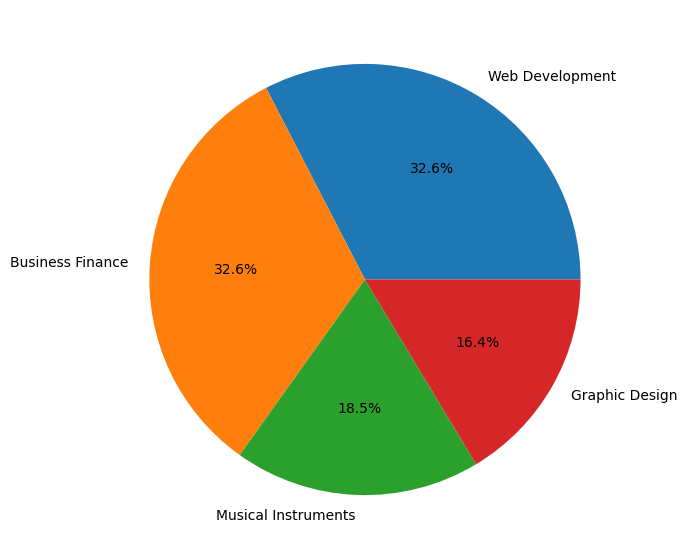

In [7]:
plt.figure(figsize=(10, 7))
plt.pie(df["subject"].value_counts(), 
        labels=df["subject"].value_counts().index, 
        autopct='%1.1f%%');

## EDA on Subscribers

* **Subscribers**
    - Which course have the highest number of subscribers?
    - Average number of subscribers?
    - Number of subscribers per subject?
    - Number of subscribers per year?

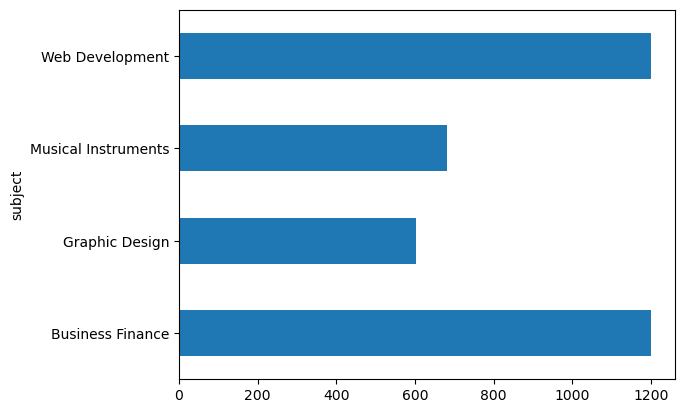

In [8]:
# Group number of subcribers by subject and get count
df.groupby("subject")["num_subscribers"].count().plot(kind="barh");

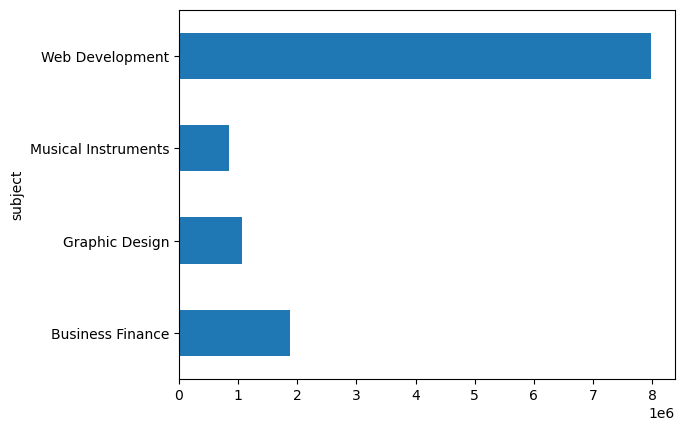

In [9]:
# Group number of subscribers by subject and get sum
df.groupby("subject")["num_subscribers"].sum().plot(kind="barh");

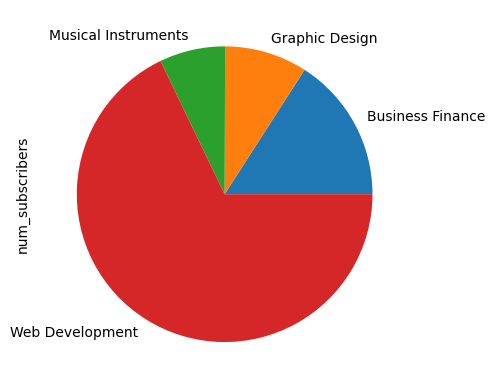

In [10]:
# pie chart of the number of subscribers per subject
df.groupby('subject')['num_subscribers'].sum().plot(kind = 'pie');

## EDA on Levels

* **Levels**
    - How many levels do we have?
    - What is the distribution of courses per level?
    - Which subject have the highest levels?
    - How many subscribers per level?
    - How many courses per level?

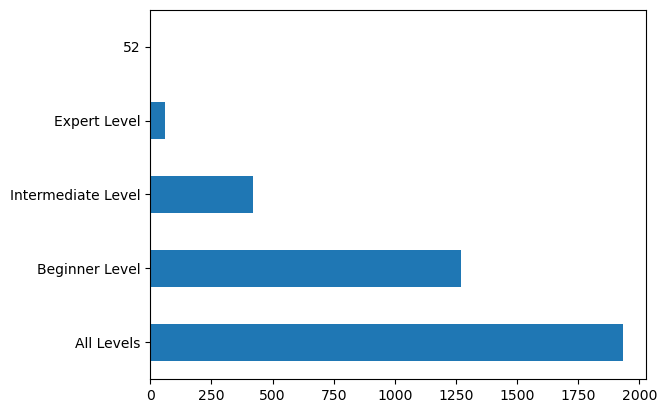

In [11]:
# Plot the count of categories of levels
df["level"].value_counts().plot(kind = "barh");

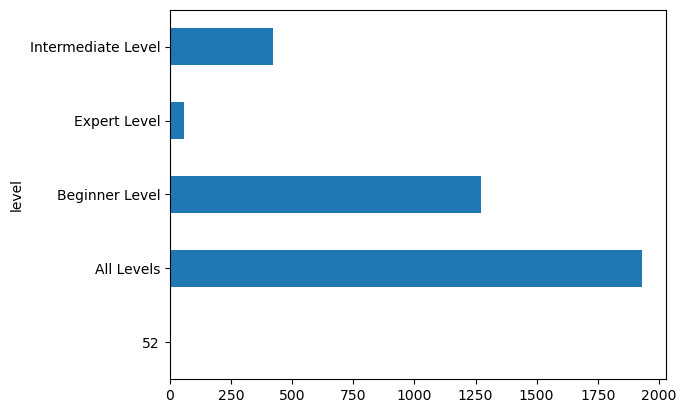

In [12]:
# Groupby levels for count of number of subscribers
df.groupby("level")["num_subscribers"].count().plot(kind="barh");

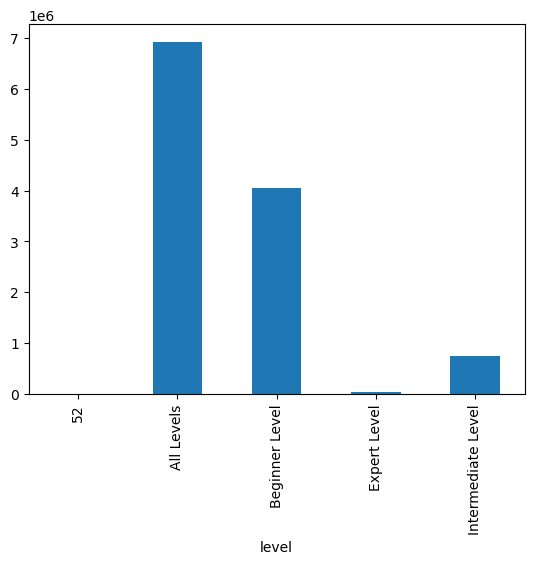

In [13]:
# groupby level for sum of number of subscribers
df.groupby("level")["num_subscribers"].sum().plot(kind="bar");

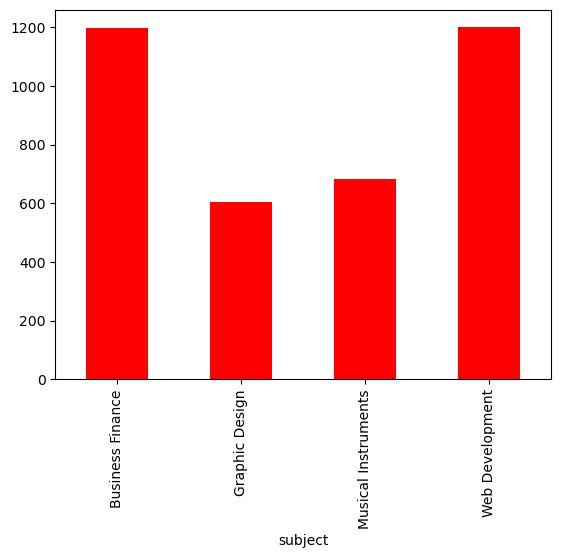

In [14]:
# plot the number of levels per subject
df.groupby("subject")["level"].count().plot(kind="bar", color="r");

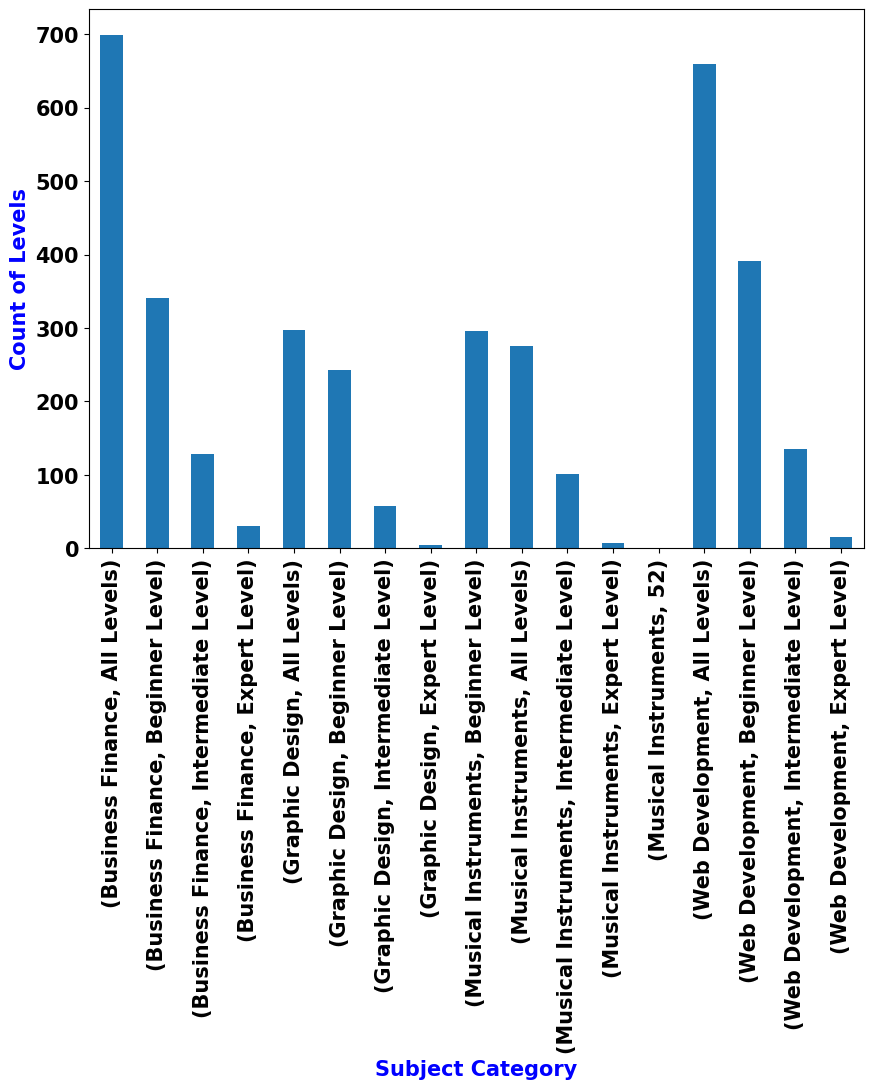

In [15]:
# Plot number of each level per subject category
plt.figure(figsize=(10, 7))
df.groupby(['subject'])['level'].value_counts().plot(kind = 'bar')
plt.xticks(fontsize = 15,fontweight = 'bold')
plt.yticks(fontsize = 15,fontweight = 'bold')
plt.xlabel('Subject Category',fontsize = 15,fontweight = 'bold',color = 'blue')
plt.ylabel('Count of Levels',fontsize = 15,fontweight = 'bold',color = 'blue');

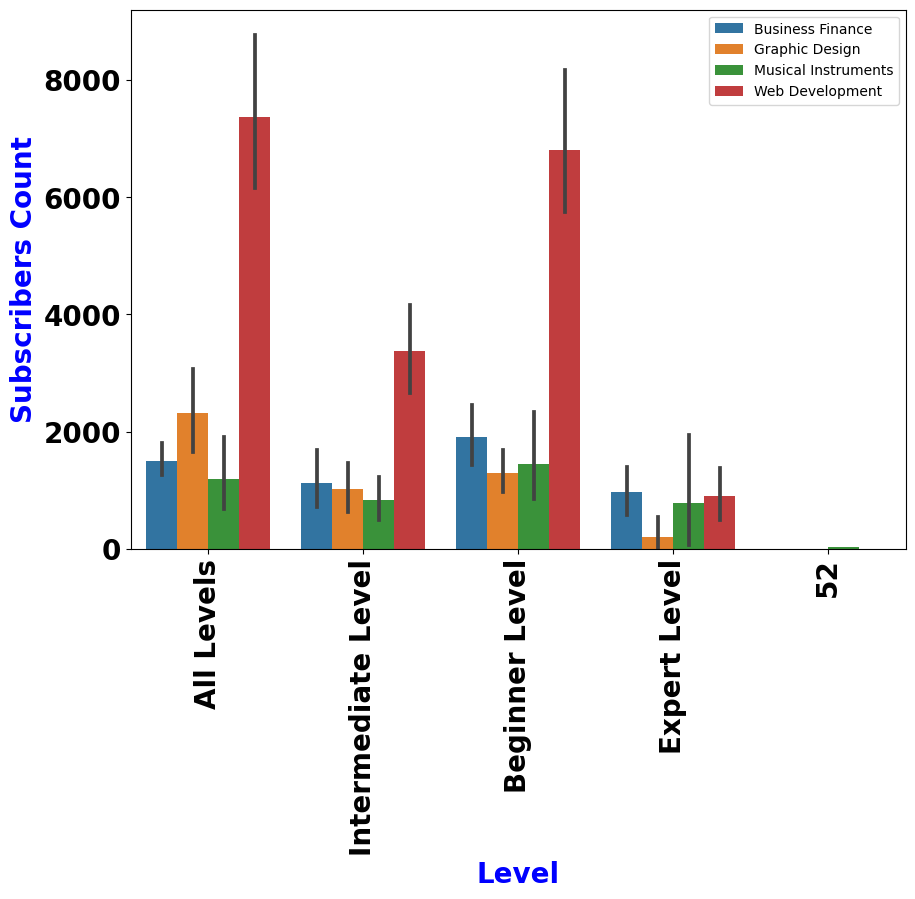

In [16]:
# number of levels an subscribers count
plt.figure(figsize=(10, 7))
sns.barplot(x="level", y="num_subscribers", hue="subject", data=df)
plt.xticks(fontsize = 20,fontweight = 'bold')
plt.yticks(fontsize = 20,fontweight = 'bold')
plt.xlabel('Level',fontsize = 20,fontweight = 'bold',
           color = 'blue')
plt.ylabel('Subscribers Count',fontsize = 20,fontweight = 'bold',
           color = 'blue')
plt.xticks(rotation = 'vertical')
plt.legend(loc='upper right');

In [17]:
df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject', 'profit',
       'published_date', 'published_time', 'year', 'month', 'day'],
      dtype='object')

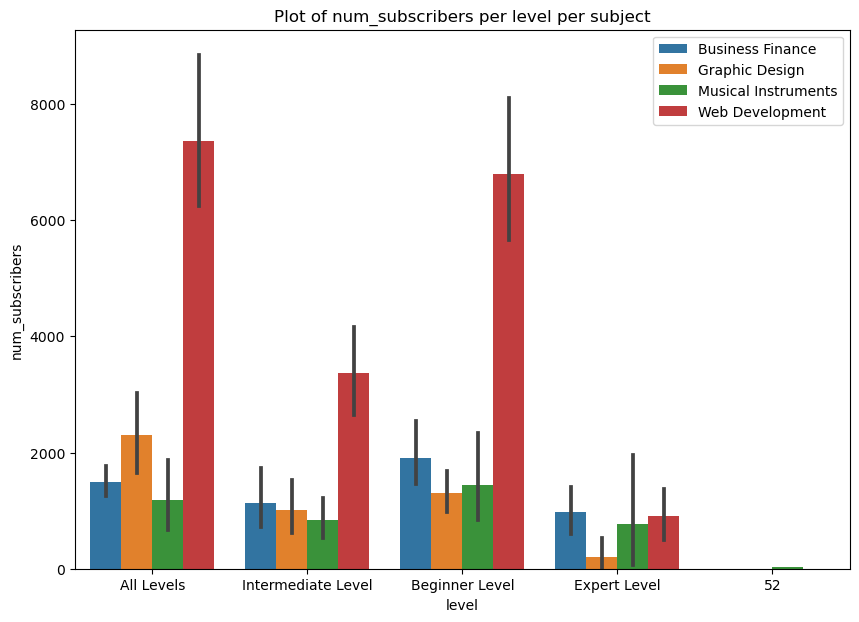

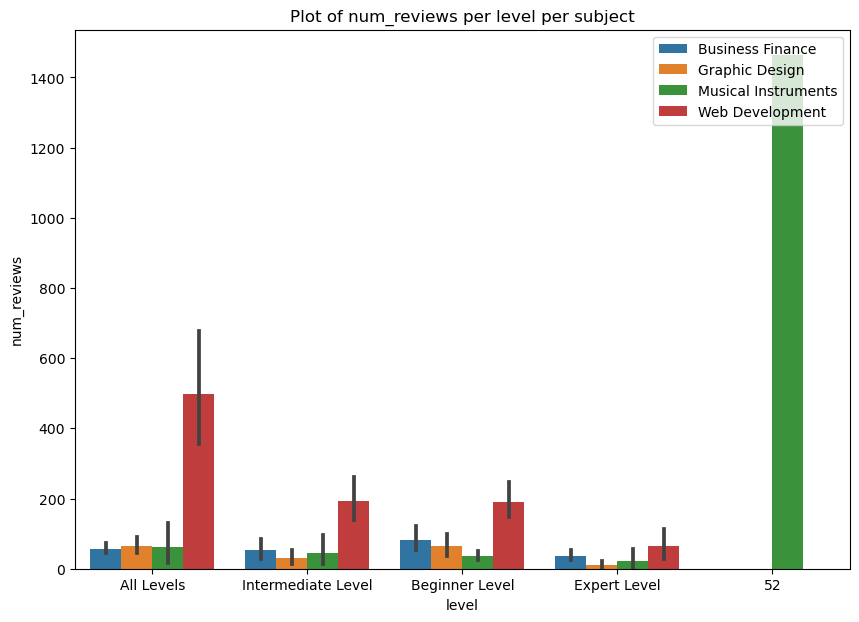

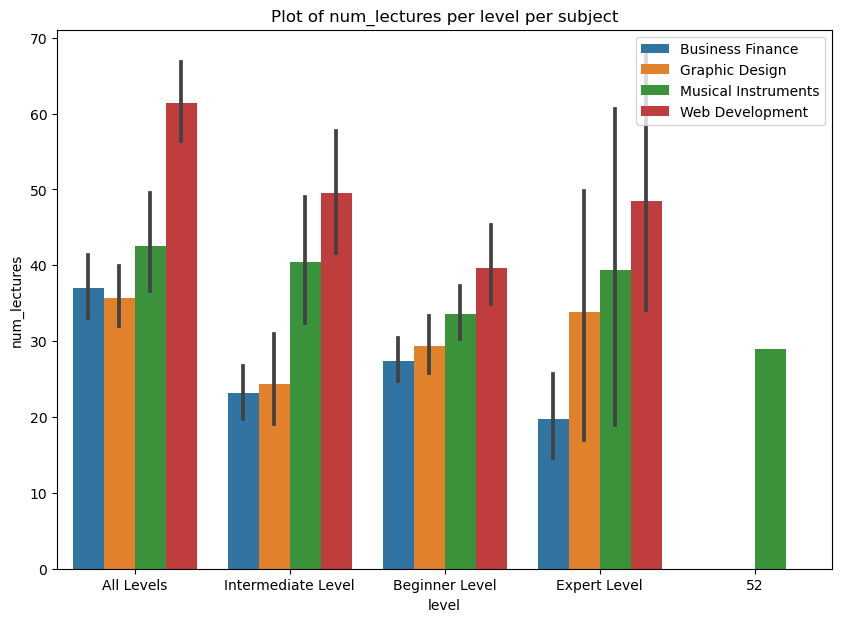

In [18]:
# reviews level plot and lectures level plots

def plot_data(df, feature):
    plt.figure(figsize=(10, 7))
    plt.title(f"Plot of {feature} per level per subject")
    sns.barplot(x="level", y=feature, data=df, hue="subject")
    plt.legend(loc='upper right')
    plt.show()
    
features_list = ['num_subscribers', 'num_reviews', 'num_lectures']

for feature in features_list:
    plot_data(df, feature)

## EDA on Price

* **Price**
    - What is the average price of a course?
    - What is the minimum and maximum price?
    - How much does Udemy earn?
    - The most profitable courses?

In [19]:
# Get the unique prices
df["price"].unique()

array([2.42  , 0.9075, 0.5445, 1.1495, 1.815 , 0.7865, 2.3595, 0.363 ,
       0.242 , 0.605 , 2.1175, 1.694 , 1.3915, 2.299 , 1.5125, 0.726 ,
       1.7545, 1.2705, 1.8755, 2.2385, 2.178 , 1.452 , 0.3025, 1.936 ,
       0.484 , 0.    , 1.21  , 1.089 , 0.4235, 0.968 , 0.847 , 0.6655,
       1.9965, 1.573 , 1.0285, 2.057 , 1.331 , 1.6335])

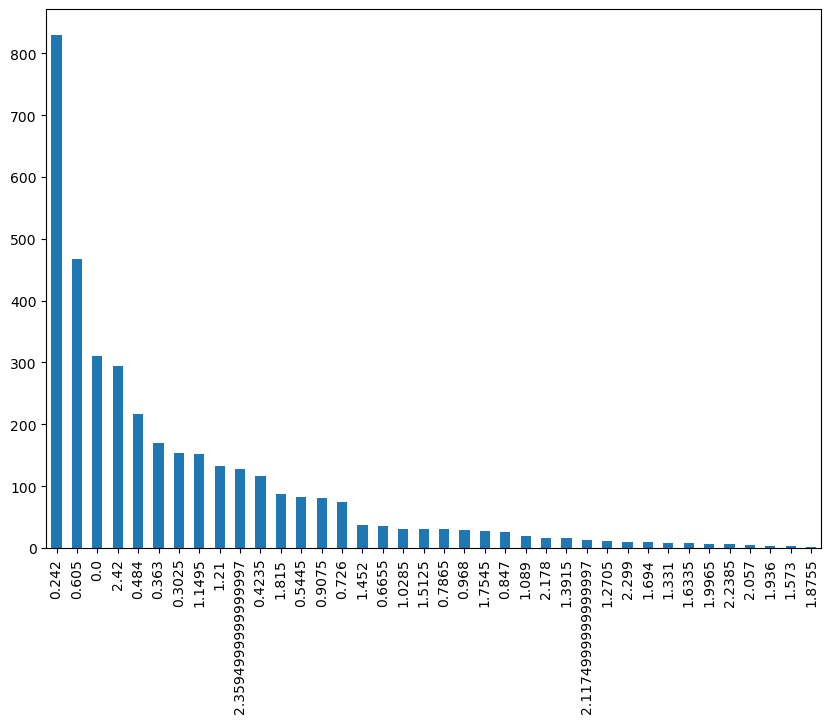

In [20]:
# plot the count plot
plt.figure(figsize=(10, 7))
df["price"].value_counts().plot(kind="bar");

In [21]:
# What is the most profitable cost (price * num_subscribers)

df["profit"] = df["price"] * df["num_subscribers"]
df.head(3)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,profit,published_date,published_time,year,month,day
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,2.4200,2147,23,51,All Levels,1.5 hours,2017-01-18T20:58:58Z,Business Finance,5195.740,2017-01-18,20:58:58Z,2017,1,18
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,0.9075,2792,923,274,All Levels,39 hours,2017-03-09T16:34:20Z,Business Finance,2533.740,2017-03-09,16:34:20Z,2017,3,9
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,0.5445,2174,74,51,Intermediate Level,2.5 hours,2016-12-19T19:26:30Z,Business Finance,1183.743,2016-12-19,19:26:30Z,2016,12,19


In [22]:
# Get the most profitable course
df[df['profit']==df['profit'].max()].style.background_gradient(cmap = 'plasma')

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,profit,published_date,published_time,year,month,day
3235,625204,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,True,2.420000,121584,27445,342,All Levels,43 hours,2015-11-02T21:13:27Z,Web Development,294233.280000,2015-11-02,21:13:27Z,2015,11,2


In [23]:
df.iloc[3235]

course_id                                                         625204
course_title                                  The Web Developer Bootcamp
url                    https://www.udemy.com/the-web-developer-bootcamp/
is_paid                                                             True
price                                                               2.42
num_subscribers                                                   121584
num_reviews                                                        27445
num_lectures                                                         342
level                                                         All Levels
content_duration                                                43 hours
published_timestamp                                 2015-11-02T21:13:27Z
subject                                                  Web Development
profit                                                         294233.28
published_date                                     

In [24]:
# Least profitable courses
# (free courses with 0 cost price)

df[df["profit"] == df["profit"].min()].style.background_gradient(cmap="plasma")

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,profit,published_date,published_time,year,month,day
97,1148774,Options Trading 101: The Basics,https://www.udemy.com/options-trading-101-the-basics/,False,0.000000,1514,66,11,Beginner Level,33 mins,2017-03-23T22:19:57Z,Business Finance,0.000000,2017-03-23,22:19:57Z,2017,3,23
105,133536,Stock Market Investing for Beginners,https://www.udemy.com/the-beginners-guide-to-the-stock-market/,False,0.000000,50855,2698,15,Beginner Level,1.5 hours,2013-12-25T19:53:34Z,Business Finance,0.000000,2013-12-25,19:53:34Z,2013,12,25
108,265960,Fundamentals of Forex Trading,https://www.udemy.com/fundamentals-of-forex-trading/,False,0.000000,17160,620,23,All Levels,1 hour,2014-08-29T20:10:38Z,Business Finance,0.000000,2014-08-29,20:10:38Z,2014,8,29
110,923616,Website Investing 101 - Buying & Selling Online Businesses,https://www.udemy.com/cash-flow-website-investing-buy-sell-online-businesses-digital-assets/,False,0.000000,6811,151,51,All Levels,2 hours,2016-08-05T17:03:15Z,Business Finance,0.000000,2016-08-05,17:03:15Z,2016,8,5
114,191854,Stock Market Foundations,https://www.udemy.com/how-to-invest-in-the-stock-market-beginners/,False,0.000000,19339,794,9,Beginner Level,2 hours,2014-03-31T21:35:06Z,Business Finance,0.000000,2014-03-31,21:35:06Z,2014,3,31
121,151668,Introduction to Financial Modeling,https://www.udemy.com/financial-modeling-asimplemodel/,False,0.000000,29167,1463,8,Intermediate Level,1.5 hours,2014-05-27T16:22:16Z,Business Finance,0.000000,2014-05-27,16:22:16Z,2014,5,27
130,777444,Corporate Finance - A Brief Introduction,https://www.udemy.com/finance-a-brief-introduction-and-basics-finance-101/,False,0.000000,11724,649,17,Beginner Level,1.5 hours,2016-03-04T05:58:09Z,Business Finance,0.000000,2016-03-04,05:58:09Z,2016,3,4
145,48841,Accounting in 60 Minutes - A Brief Introduction,https://www.udemy.com/accounting-in-60-minutes-a-brief-introduction/,False,0.000000,56659,4397,16,Beginner Level,1.5 hours,2013-04-07T21:39:25Z,Business Finance,0.000000,2013-04-07,21:39:25Z,2013,4,7
181,1188742,Introduction to Cryptocurrencies and Blockchain,https://www.udemy.com/introduction-to-cryptocurrencies/,False,0.000000,3775,138,11,Beginner Level,2 hours,2017-05-01T21:18:54Z,Business Finance,0.000000,2017-05-01,21:18:54Z,2017,5,1
195,919906,Trading Options For Consistent Returns: Options Basics,https://www.udemy.com/trading-options-for-income/,False,0.000000,4077,281,20,Beginner Level,1.5 hours,2016-08-18T21:57:04Z,Business Finance,0.000000,2016-08-18,21:57:04Z,2016,8,18


In [25]:
# Average profitable course
df[df["profit"] >= df["profit"].mean()].style.background_gradient(cmap="plasma")

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,profit,published_date,published_time,year,month,day
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-banking-course/,True,2.420000,2147,23,51,All Levels,1.5 hours,2017-01-18T20:58:58Z,Business Finance,5195.740000,2017-01-18,20:58:58Z,2017,1,18
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-profits-trading-options/,True,2.420000,1276,45,26,Intermediate Level,2 hours,2016-12-13T14:57:18Z,Business Finance,3087.920000,2016-12-13,14:57:18Z,2016,12,13
5,192870,Trading Penny Stocks: A Guide for All Levels In 2017,https://www.udemy.com/trading-penny-stocks-a-guide-for-all-levels/,True,1.815000,9221,138,25,All Levels,3 hours,2014-05-02T15:13:30Z,Business Finance,16736.115000,2014-05-02,15:13:30Z,2014,5,2
7,403100,"Trading Stock Chart Patterns For Immediate, Explosive Gains",https://www.udemy.com/trading-chart-patterns-for-immediate-explosive-gains/,True,1.149500,2917,148,23,All Levels,2.5 hours,2015-01-30T22:13:03Z,Business Finance,3353.091500,2015-01-30,22:13:03Z,2015,1,30
8,476268,Options Trading 3 : Advanced Stock Profit and Success Method,https://www.udemy.com/day-trading-stock-options-3/,True,2.359500,5172,34,38,Expert Level,2.5 hours,2015-05-28T00:14:03Z,Business Finance,12203.334000,2015-05-28,00:14:03Z,2015,5,28
10,592338,Forex Trading Secrets of the Pros With Amazon's AWS,https://www.udemy.com/trading-with-amazons-aws-servers-trade-secrets-of-the-pros/,True,2.420000,4284,93,76,All Levels,5 hours,2015-09-11T16:47:02Z,Business Finance,10367.280000,2015-09-11,16:47:02Z,2015,9,11
11,975046,Trading Options With Money Flow,https://www.udemy.com/trading-options-using-money-flow/,True,2.420000,1380,42,17,All Levels,1 hour,2016-10-18T22:52:31Z,Business Finance,3339.600000,2016-10-18,22:52:31Z,2016,10,18
13,794151,Forex Trading Course: Work Smarter Not Harder Proven Results,https://www.udemy.com/the-complete-trading-course/,True,2.359500,4061,52,16,All Levels,2 hours,2016-03-16T15:40:19Z,Business Finance,9581.929500,2016-03-16,15:40:19Z,2016,3,16
17,564966,The Complete Chart Pattern Trading Course: A Proven Approach,https://www.udemy.com/make-money-trading-stocks-from-home/,True,2.420000,2666,115,52,All Levels,4 hours,2015-08-10T21:07:35Z,Business Finance,6451.720000,2015-08-10,21:07:35Z,2015,8,10
18,606928,7 Deadly Mistakes of Investing that Will Slash Your Profits!,https://www.udemy.com/7-deadly-mistakes-of-investing/,True,0.605000,5354,24,23,All Levels,1.5 hours,2015-09-21T18:10:34Z,Business Finance,3239.170000,2015-09-21,18:10:34Z,2015,9,21


In [26]:
# How many course on udemy are paid or free
df["is_paid"].unique()

array([ True, False])

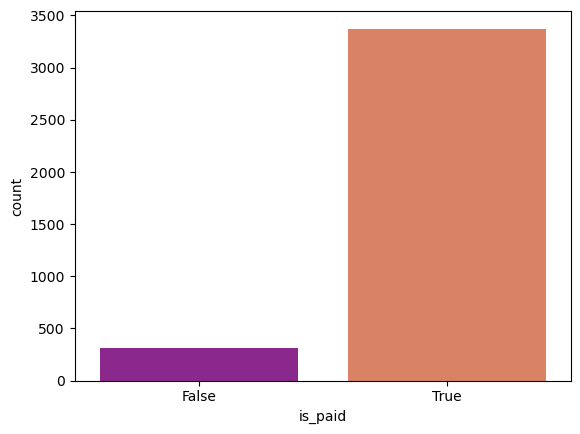

In [27]:
# plot coutnplot of "is_paid" column
sns.countplot(x="is_paid", data=df, palette="plasma");

In [28]:
# groupby is_paid by count subjects
df.groupby(["is_paid"])["subject"].value_counts()

is_paid  subject            
False    Web Development         133
         Business Finance         96
         Musical Instruments      46
         Graphic Design           35
True     Business Finance       1103
         Web Development        1067
         Musical Instruments     635
         Graphic Design          568
Name: subject, dtype: int64

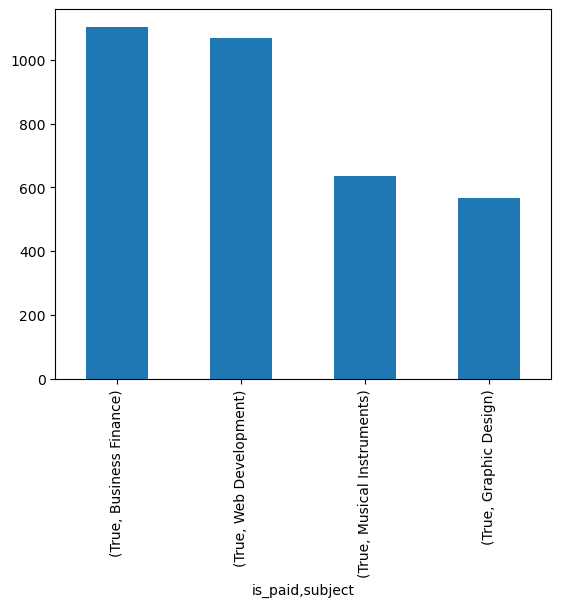

In [29]:
# get paid courses with subjects
df[df["is_paid"]==True].groupby(['is_paid'])['subject'].value_counts().plot(kind = 'bar');

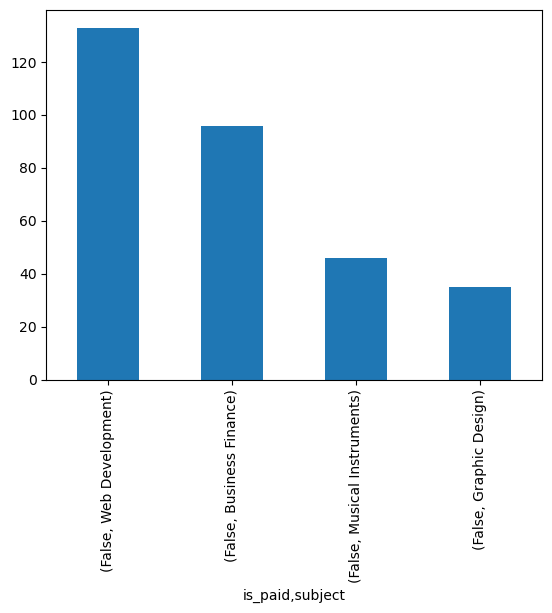

In [30]:
# free courses with subjects

df[df['is_paid']==False].groupby(['is_paid'])['subject'].value_counts().plot(kind = 'bar');

## Correlation Questions

* **Correlation**
    - Does number of subscribers depend on;
        - Number of reviews?
        - Price?
        - Number of lectures?
        - Content duration?

In [31]:
# get the columns of the entire dataframe
df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject', 'profit',
       'published_date', 'published_time', 'year', 'month', 'day'],
      dtype='object')

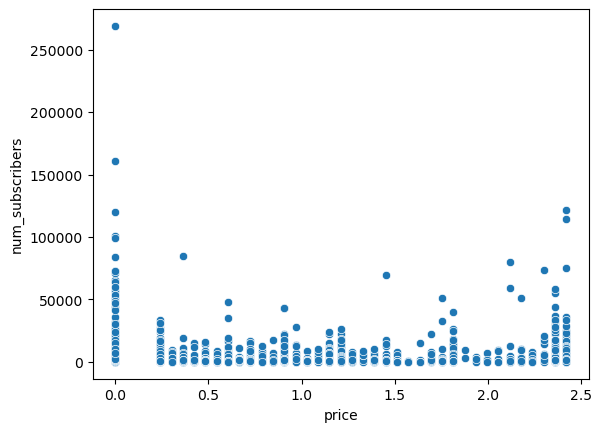

In [32]:
# plot the price against the number of subscribers
sns.scatterplot(data=df, x="price", y="num_subscribers");

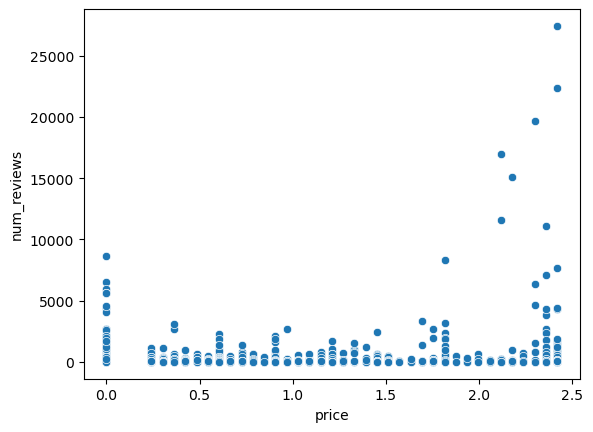

In [33]:
# ploot price vs num_reviews
sns.scatterplot(data=df, x="price", y="num_reviews");

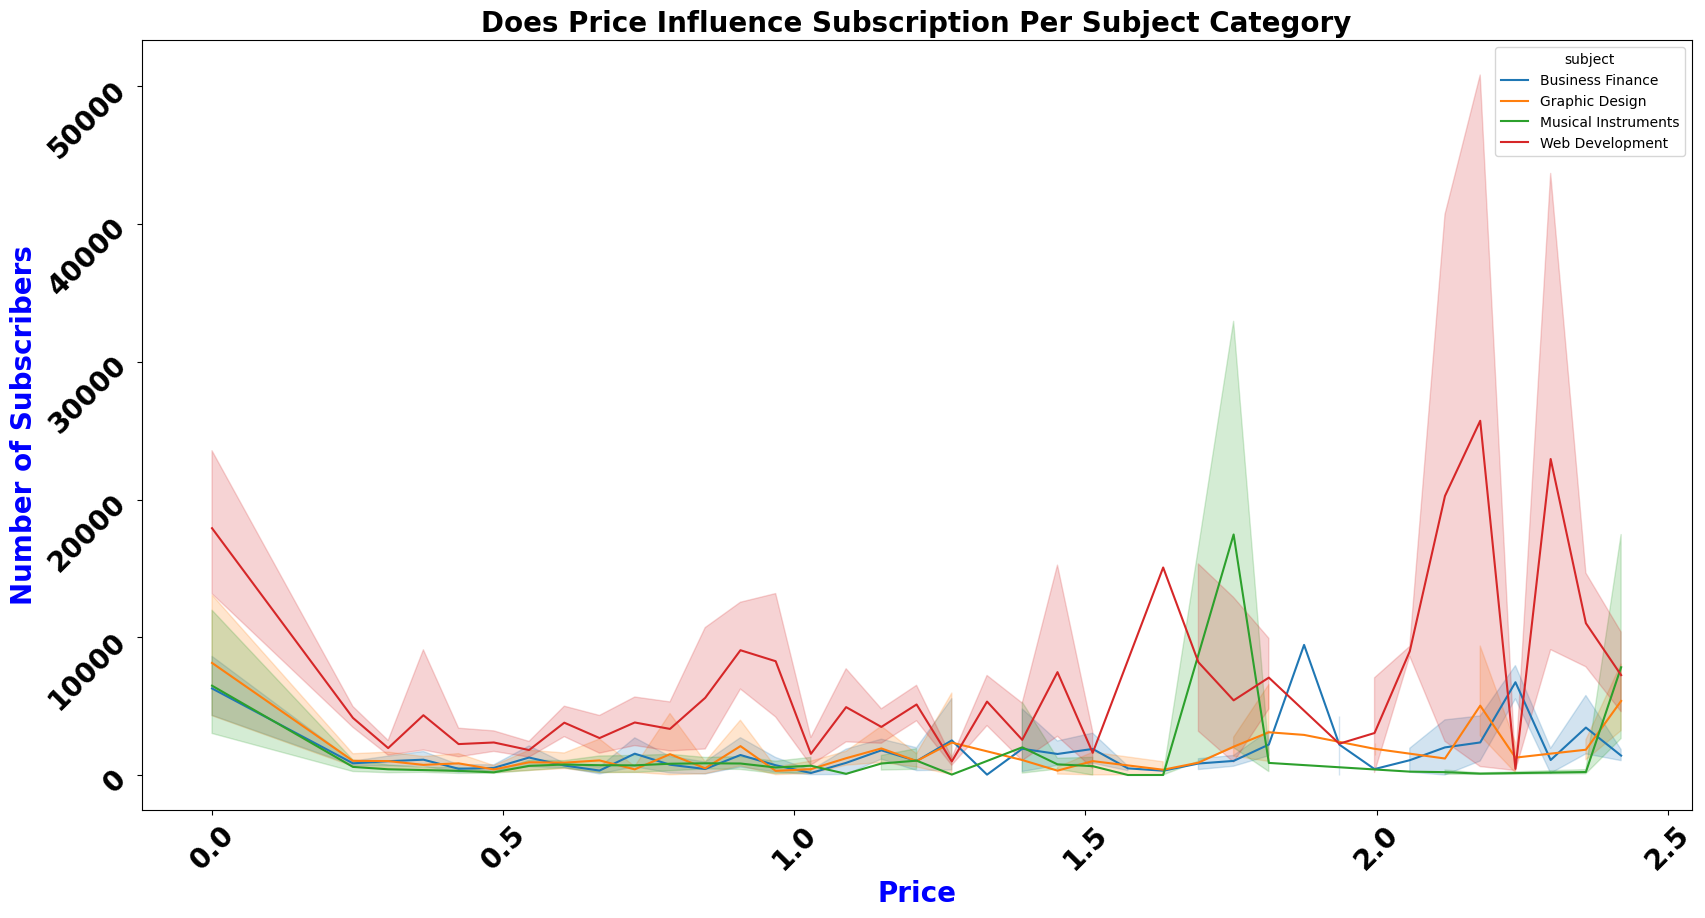

In [34]:
# Plot to see if price influence subscriptiop per subject
plt.figure(figsize=(20,10))
plt.title("Does Price Influence Subscription Per Subject Category",
         fontsize = 20,fontweight = 'bold')

sns.lineplot(data=df,x='price',y='num_subscribers', hue='subject')

plt.xticks(fontsize = 20,fontweight = 'bold',rotation = 45)
plt.yticks(fontsize = 20,fontweight = 'bold',rotation = 45)
plt.xlabel('Price',fontsize = 20,fontweight = 'bold',
           color = 'blue')
plt.ylabel('Number of Subscribers',fontsize = 20,fontweight = 'bold',
           color = 'blue')



plt.show()

## Time

* **Question on Time**
    - Published Year
        - Number of courses per year?
        - Distribution of subjects per year?
        - Which year has the highest number of courses?
        - What is the trend of courses per year?

In [35]:
df["published_timestamp"].head()

0    2017-01-18T20:58:58Z
1    2017-03-09T16:34:20Z
2    2016-12-19T19:26:30Z
3    2017-05-30T20:07:24Z
4    2016-12-13T14:57:18Z
Name: published_timestamp, dtype: object

In [36]:
df['published_timestamp'].iloc[2060:2070]

2060    2015-11-12T17:59:28Z
2061    2015-04-16T16:43:45Z
2062    2016-07-02T14:48:10Z
2063    2015-10-13T20:36:14Z
2064    2016-04-22T23:43:37Z
2065    2016-04-20T23:05:39Z
2066                 3 hours
2067    2013-09-30T20:45:20Z
2068    2015-08-18T20:00:20Z
2069    2016-02-22T17:09:58Z
Name: published_timestamp, dtype: object

In [37]:
# drop the 2066 index
# df.drop(index=2066, inplace=True)
df = df.drop(df.index[2066])

In [38]:
df['published_timestamp'].iloc[2060:2070]

2060    2015-11-12T17:59:28Z
2061    2015-04-16T16:43:45Z
2062    2016-07-02T14:48:10Z
2063    2015-10-13T20:36:14Z
2064    2016-04-22T23:43:37Z
2065    2016-04-20T23:05:39Z
2067    2013-09-30T20:45:20Z
2068    2015-08-18T20:00:20Z
2069    2016-02-22T17:09:58Z
2070    2013-05-02T11:38:58Z
Name: published_timestamp, dtype: object

In [39]:
# we need to extract year,month,date from the published timestamp

# so for that i will extract the year-month-date from the timestamp 

df['published_date'] = df['published_timestamp'].apply(lambda x:x.split('T')[0])

In [40]:
df.head(2)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,profit,published_date,published_time,year,month,day
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,2.4200,2147,23,51,All Levels,1.5 hours,2017-01-18T20:58:58Z,Business Finance,5195.74,2017-01-18,20:58:58Z,2017,1,18
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,0.9075,2792,923,274,All Levels,39 hours,2017-03-09T16:34:20Z,Business Finance,2533.74,2017-03-09,16:34:20Z,2017,3,9


In [41]:
# converting the published date to pandas datetime object

df['published_date'] = pd.to_datetime(df['published_date'],format="%Y-%m-%d")

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3682 entries, 0 to 3682
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   course_id            3682 non-null   int64         
 1   course_title         3682 non-null   object        
 2   url                  3682 non-null   object        
 3   is_paid              3682 non-null   bool          
 4   price                3682 non-null   float64       
 5   num_subscribers      3682 non-null   int64         
 6   num_reviews          3682 non-null   int64         
 7   num_lectures         3682 non-null   int64         
 8   level                3682 non-null   object        
 9   content_duration     3682 non-null   object        
 10  published_timestamp  3682 non-null   object        
 11  subject              3682 non-null   object        
 12  profit               3682 non-null   float64       
 13  published_date       3682 non-nul

In [43]:
# Extracting year, month, day, month_name
df['Year'] = df['published_date'].dt.year

df['Month'] = df['published_date'].dt.month

df['Day'] = df['published_date'].dt.day

df['Month_name'] = df['published_date'].dt.month_name()


df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,...,profit,published_date,published_time,year,month,day,Year,Month,Day,Month_name
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,2.4200,2147,23,51,All Levels,1.5 hours,...,5195.7400,2017-01-18,20:58:58Z,2017,1,18,2017,1,18,January
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,0.9075,2792,923,274,All Levels,39 hours,...,2533.7400,2017-03-09,16:34:20Z,2017,3,9,2017,3,9,March
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,0.5445,2174,74,51,Intermediate Level,2.5 hours,...,1183.7430,2016-12-19,19:26:30Z,2016,12,19,2016,12,19,December
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,1.1495,2451,11,36,All Levels,3 hours,...,2817.4245,2017-05-30,20:07:24Z,2017,5,30,2017,5,30,May
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,2.4200,1276,45,26,Intermediate Level,2 hours,...,3087.9200,2016-12-13,14:57:18Z,2016,12,13,2016,12,13,December


In [44]:
df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject', 'profit',
       'published_date', 'published_time', 'year', 'month', 'day', 'Year',
       'Month', 'Day', 'Month_name'],
      dtype='object')

Text(0, 0.5, 'Profit')

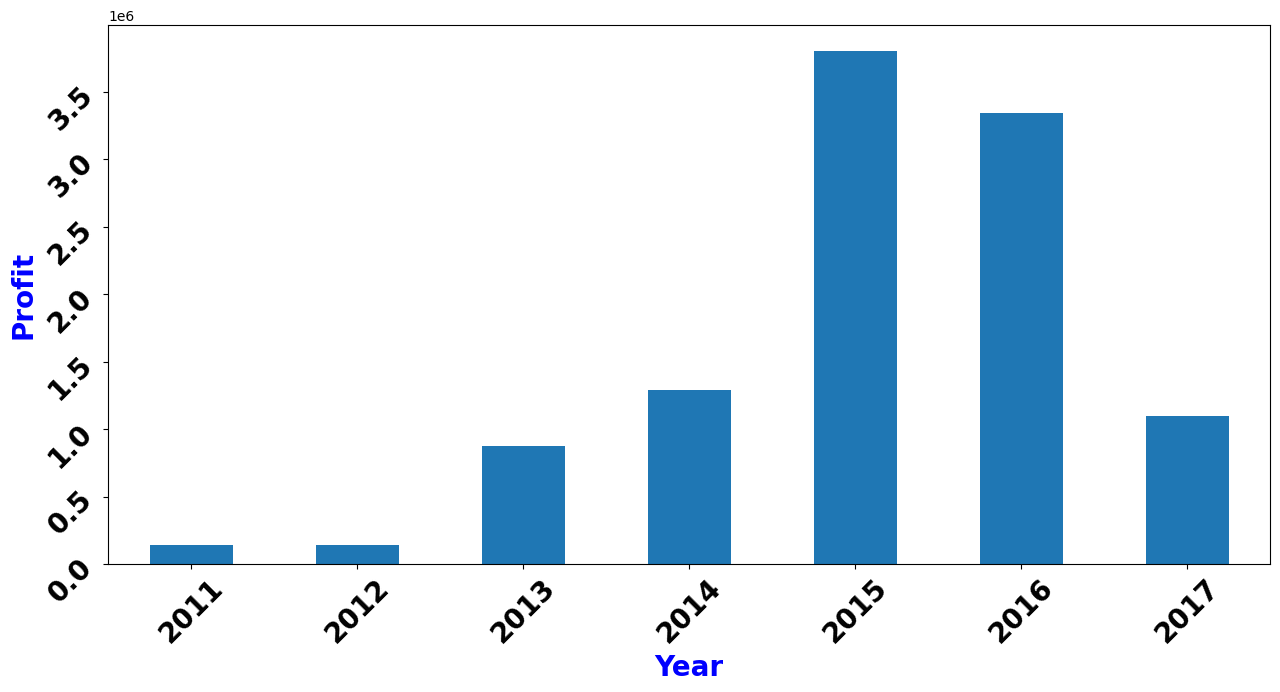

In [52]:
# profit year wise

plt.figure(figsize=(15,7))
df.groupby(['Year'])['profit'].sum().plot(kind = 'bar')
plt.xticks(fontsize = 20,fontweight = 'bold',rotation = 45)
plt.yticks(fontsize = 20,fontweight = 'bold',rotation = 45)
plt.xlabel('Year',fontsize = 20,fontweight = 'bold',
           color = 'blue')
plt.ylabel('Profit',fontsize = 20,fontweight = 'bold',
           color = 'blue')

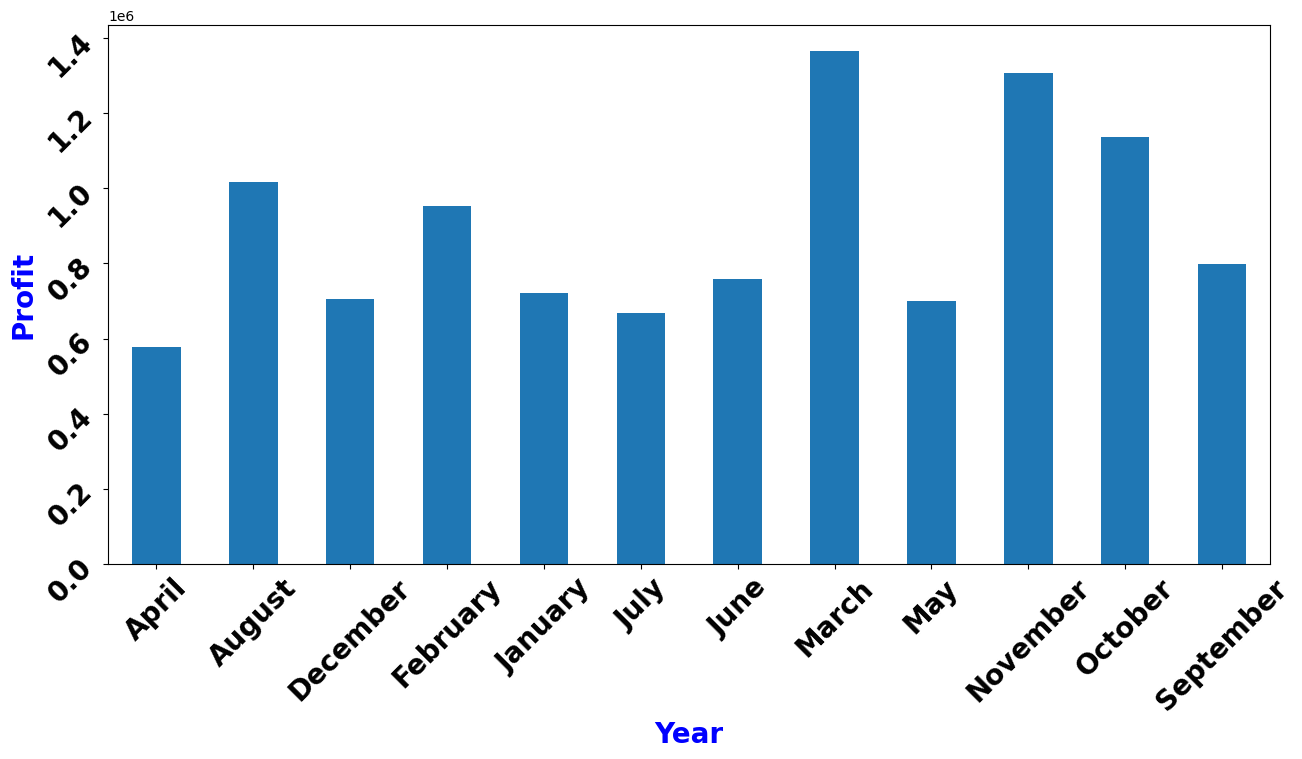

In [55]:
# profit month wise

plt.figure(figsize=(15,7))
df.groupby(['Month_name'])['profit'].sum().plot(kind = 'bar')
plt.xticks(fontsize = 20,fontweight = 'bold',rotation = 45)
plt.yticks(fontsize = 20,fontweight = 'bold',rotation = 45)
plt.xlabel('Year',fontsize = 20,fontweight = 'bold',
           color = 'blue')
plt.ylabel('Profit',fontsize = 20,fontweight = 'bold',
           color = 'blue');

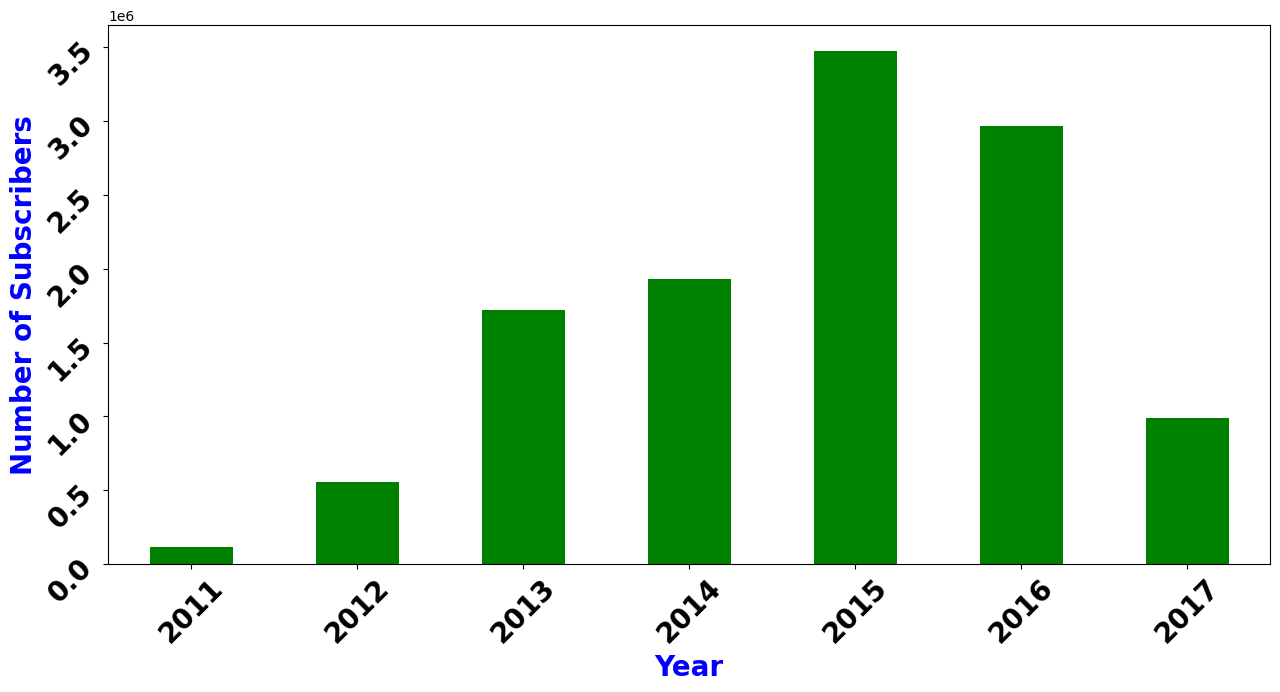

In [54]:
# number of subscribers per year

plt.figure(figsize=(15,7))
df.groupby(['Year'])['num_subscribers'].sum().plot(kind = 'bar',color = 'green')

plt.xticks(fontsize = 20,fontweight = 'bold',rotation = 45)
plt.yticks(fontsize = 20,fontweight = 'bold',rotation = 45)
plt.xlabel('Year',fontsize = 20,fontweight = 'bold',
           color = 'blue')
plt.ylabel('Number of Subscribers',fontsize = 20,fontweight = 'bold',
           color = 'blue');

Text(0, 0.5, 'Number of Subscribers')

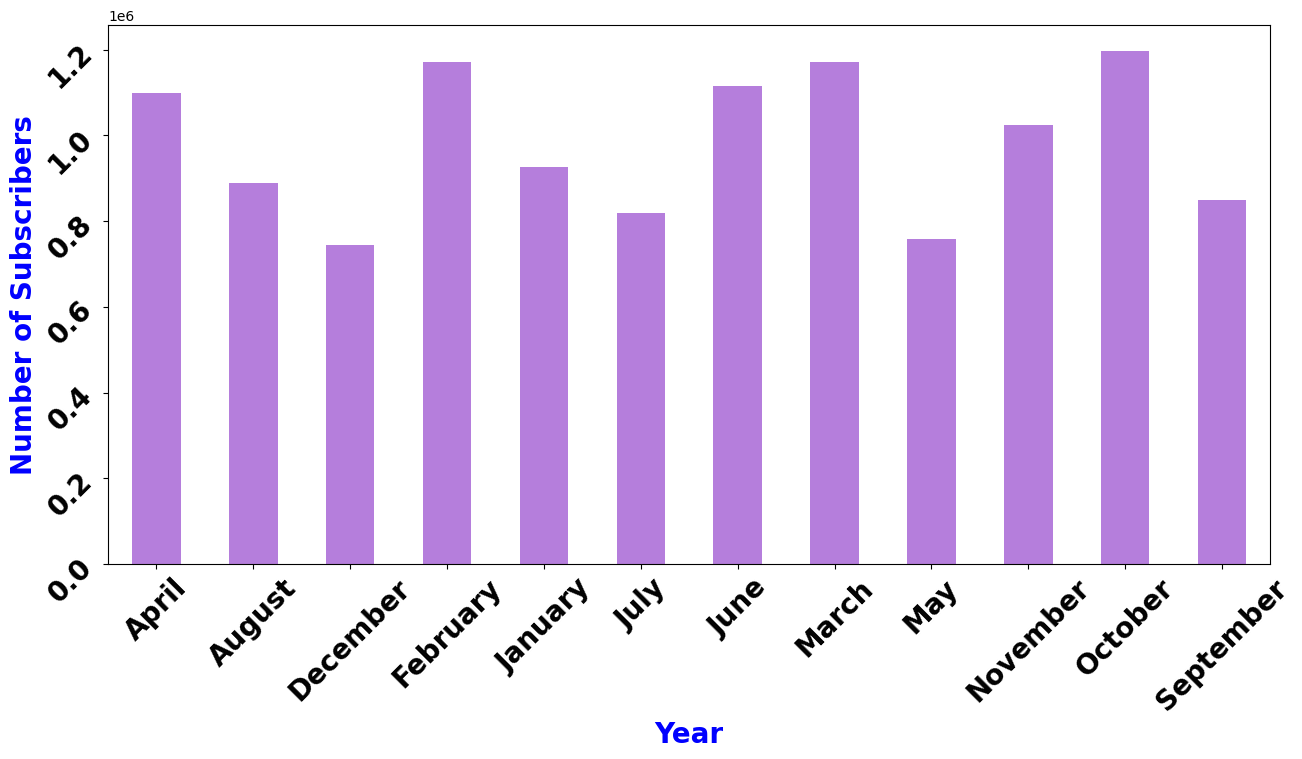

In [56]:
# number of subscribers month wise

plt.figure(figsize=(15,7))
df.groupby(['Month_name'])['num_subscribers'].sum().plot(kind = 'bar',
                                                         color = '#b57edc')

plt.xticks(fontsize = 20,fontweight = 'bold',rotation = 45)
plt.yticks(fontsize = 20,fontweight = 'bold',rotation = 45)
plt.xlabel('Year',fontsize = 20,fontweight = 'bold',
           color = 'blue')
plt.ylabel('Number of Subscribers',fontsize = 20,fontweight = 'bold',
           color = 'blue');

## Questions on Course Title

* **Course Title**
    - What is the most frequent words in course title?
    - Longest/Shortest course title?
    - How can we build recommendation systems via title using similarity?
    - Most famous courses by number of subscribers?

In [57]:
df.head(3)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,...,profit,published_date,published_time,year,month,day,Year,Month,Day,Month_name
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,2.4200,2147,23,51,All Levels,1.5 hours,...,5195.740,2017-01-18,20:58:58Z,2017,1,18,2017,1,18,January
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,0.9075,2792,923,274,All Levels,39 hours,...,2533.740,2017-03-09,16:34:20Z,2017,3,9,2017,3,9,March
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,0.5445,2174,74,51,Intermediate Level,2.5 hours,...,1183.743,2016-12-19,19:26:30Z,2016,12,19,2016,12,19,December


In [68]:
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,...,profit,published_date,published_time,year,month,day,Year,Month,Day,Month_name
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,2.4200,2147,23,51,All Levels,1.5 hours,...,5195.7400,2017-01-18,20:58:58Z,2017,1,18,2017,1,18,January
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,0.9075,2792,923,274,All Levels,39 hours,...,2533.7400,2017-03-09,16:34:20Z,2017,3,9,2017,3,9,March
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,0.5445,2174,74,51,Intermediate Level,2.5 hours,...,1183.7430,2016-12-19,19:26:30Z,2016,12,19,2016,12,19,December
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,1.1495,2451,11,36,All Levels,3 hours,...,2817.4245,2017-05-30,20:07:24Z,2017,5,30,2017,5,30,May
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,2.4200,1276,45,26,Intermediate Level,2 hours,...,3087.9200,2016-12-13,14:57:18Z,2016,12,13,2016,12,13,December


In [66]:
# course title with maximum length
df[df["course_title"].str.len()==max(df["course_title"].str.len())]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,...,profit,published_date,published_time,year,month,day,Year,Month,Day,Month_name
2191,286898,Aprende a tocar el Acordeón 'de oído y con téc...,https://www.udemy.com/aprende-los-secretos-de-...,True,0.9075,158,17,59,All Levels,2.5 hours,...,143.385,2014-07-28,13:55:43Z,2014,7,28,2014,7,28,July


In [73]:
df["course_title"].iloc[2190]

'Aprende a tocar el Acordeón \'de oído y con técnica",https://www.udemy.com/aprende-a-tocar-el-acordeon-de-oido-y-con-tecnica/,true,25,93,21,34,Beginner Level,4 hours,2014-09-16T19:51:45Z\n263432,Aprende los Secretos de la Armónica con HARP&SOUL"'

In [72]:
df.iloc[2190]

course_id                                                         286898
course_title           Aprende a tocar el Acordeón 'de oído y con téc...
url                    https://www.udemy.com/aprende-los-secretos-de-...
is_paid                                                             True
price                                                             0.9075
num_subscribers                                                      158
num_reviews                                                           17
num_lectures                                                          59
level                                                         All Levels
content_duration                                               2.5 hours
published_timestamp                                 2014-07-28T13:55:43Z
subject                                              Musical Instruments
profit                                                           143.385
published_date                                     

In [74]:
# most reviewed course

df[df['num_reviews']==max(df['num_reviews'])]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,...,profit,published_date,published_time,year,month,day,Year,Month,Day,Month_name
3235,625204,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,True,2.42,121584,27445,342,All Levels,43 hours,...,294233.28,2015-11-02,21:13:27Z,2015,11,2,2015,11,2,November


In [75]:
# course title with minimum length
df[df["course_title"].str.len()==min(df["course_title"].str.len())]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,...,profit,published_date,published_time,year,month,day,Year,Month,Day,Month_name
1328,1164570,调色高级讲解,https://www.udemy.com/dezepioy/,True,2.42,4,2,8,Beginner Level,1 hour,...,9.68,2017-03-31,17:16:15Z,2017,3,31,2017,3,31,March
1674,1164720,调色中级课程,https://www.udemy.com/ixlnjjvn/,True,2.42,5,3,7,Beginner Level,1 hour,...,12.10,2017-03-31,17:19:38Z,2017,3,31,2017,3,31,March


In [79]:
df['course_title'].iloc[1674]

'调色中级课程'

In [80]:
df.iloc[1674]

course_id                                      1164720
course_title                                    调色中级课程
url                    https://www.udemy.com/ixlnjjvn/
is_paid                                           True
price                                             2.42
num_subscribers                                      5
num_reviews                                          3
num_lectures                                         7
level                                   Beginner Level
content_duration                                1 hour
published_timestamp               2017-03-31T17:19:38Z
subject                                 Graphic Design
profit                                            12.1
published_date                     2017-03-31 00:00:00
published_time                               17:19:38Z
year                                              2017
month                                                3
day                                                 31
Year      

In [81]:
df['course_title'].iloc[1327]

'超基礎！超入門！〜作りながら学ぶ。完全無料3DCGソフトBlender〜'

In [77]:
df.iloc[1327]

course_id                                              1009622
course_title              超基礎！超入門！〜作りながら学ぶ。完全無料3DCGソフトBlender〜
url                    https://www.udemy.com/blender-beginner/
is_paid                                                   True
price                                                    0.968
num_subscribers                                              8
num_reviews                                                  1
num_lectures                                                43
level                                           Beginner Level
content_duration                                     5.5 hours
published_timestamp                       2016-12-14T01:25:19Z
subject                                         Graphic Design
profit                                                   7.744
published_date                             2016-12-14 00:00:00
published_time                                       01:25:19Z
year                                                   

## Keyword Extraction

* Rake
* Yakes
* Collection

In [82]:
# Text Cleaning to remove stopwords
import neattext.functions as nfx

In [83]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [84]:
# removing all the stopwords

df['Clean_title'] = df['course_title'].apply(nfx.remove_shortwords)
df['Clean_title'].iloc[1:5]

1    Complete Course Certification Grow Your Practice
2    Financial Modeling Business Analysts Consultants
3              Beginner Financial Analysis Excel 2017
4               Maximize Your Profits Trading Options
Name: Clean_title, dtype: object

In [85]:
# head on head comparision with clean and unclean title

temp = df[['Clean_title','course_title']]

temp.head()

,Clean_title,course_title
0,Ultimate Investment Banking Course,Ultimate Investment Banking Course
1,Complete Course Certification Grow Your Practice,Complete GST Course & Certification - Grow You...
2,Financial Modeling Business Analysts Consultants,Financial Modeling for Business Analysts and C...
3,Beginner Financial Analysis Excel 2017,Beginner to Pro - Financial Analysis in Excel ...
4,Maximize Your Profits Trading Options,How To Maximize Your Profits Trading Options


In [87]:
# finding the maximum length of the clean title

temp[temp['Clean_title'].str.len()==max(temp['Clean_title'].str.len())]

,Clean_title,course_title
293,Multiply your returns using Value Investing ht...,"Multiply your returns using 'Value Investing"",..."


In [88]:
temp['Clean_title'].iloc[293]

'Multiply your returns using Value Investing https udemy multiply your returns using value investing true 1942 Levels hours 2015 23T00 874284 Weekly Forex Analysis Baraq'

In [89]:
temp['course_title'].iloc[293]

'Multiply your returns using \'Value Investing",https://www.udemy.com/multiply-your-returns-using-value-investing/,true,20,1942,19,63,All Levels,4.5 hours,2015-07-23T00:08:33Z\n874284,Weekly Forex Analysis by Baraq FX"'

In [90]:
# we can observe special characters in clean title,we'll remove them

df['Clean_title'] = df['Clean_title'].apply(nfx.remove_special_characters)
df['Clean_title'].iloc[1:5]

1    Complete Course Certification Grow Your Practice
2    Financial Modeling Business Analysts Consultants
3              Beginner Financial Analysis Excel 2017
4               Maximize Your Profits Trading Options
Name: Clean_title, dtype: object

In [91]:
# tokenisation

all_title_list = df['Clean_title'].to_list()

all_title_list[1:5]

['Complete Course Certification Grow Your Practice',
 'Financial Modeling Business Analysts Consultants',
 'Beginner Financial Analysis Excel 2017',
 'Maximize Your Profits Trading Options']

In [94]:
all_title_list[-5:]

['Learn jQuery from Scratch Master JavaScript library',
 'Design WordPress Website With Coding',
 'Learn Build using Polymer',
 'Animations Create Amazing Effects Your Website',
 'Using MODX Build Websites Beginner Guide']

In [98]:
all_tokens = [token for line in all_title_list for token in line.split()]

print(len(all_tokens))

all_tokens[:4]

18227


['Ultimate', 'Investment', 'Banking', 'Course']

In [99]:
## top50 frequently used words 

from collections import Counter

freq_words = dict(Counter(all_tokens).most_common(50))

freq_words

{'Learn': 495,
 'Trading': 281,
 'with': 278,
 'Course': 235,
 'Beginners': 235,
 'Guitar': 211,
 'Design': 189,
 'Complete': 181,
 'Piano': 179,
 'Photoshop': 169,
 'Forex': 165,
 'Build': 164,
 'Financial': 139,
 'Beginner': 138,
 'Create': 136,
 'JavaScript': 124,
 'Your': 119,
 'HTML': 118,
 'Guide': 116,
 'Accounting': 114,
 'Website': 111,
 'from': 111,
 'Development': 110,
 'Options': 101,
 'From': 101,
 'Play': 100,
 'Adobe': 100,
 'With': 99,
 'Introduction': 93,
 'Master': 92,
 'Illustrator': 90,
 'Basics': 89,
 'Scratch': 83,
 'WordPress': 83,
 'Level': 80,
 'Professional': 79,
 'Analysis': 78,
 'Advanced': 77,
 'Easy': 76,
 'Lessons': 73,
 'HTML5': 68,
 'Trade': 66,
 'Stock': 65,
 'Bootstrap': 64,
 'Business': 62,
 'play': 61,
 'Angular': 58,
 'your': 57,
 'Building': 56,
 'Stocks': 55}

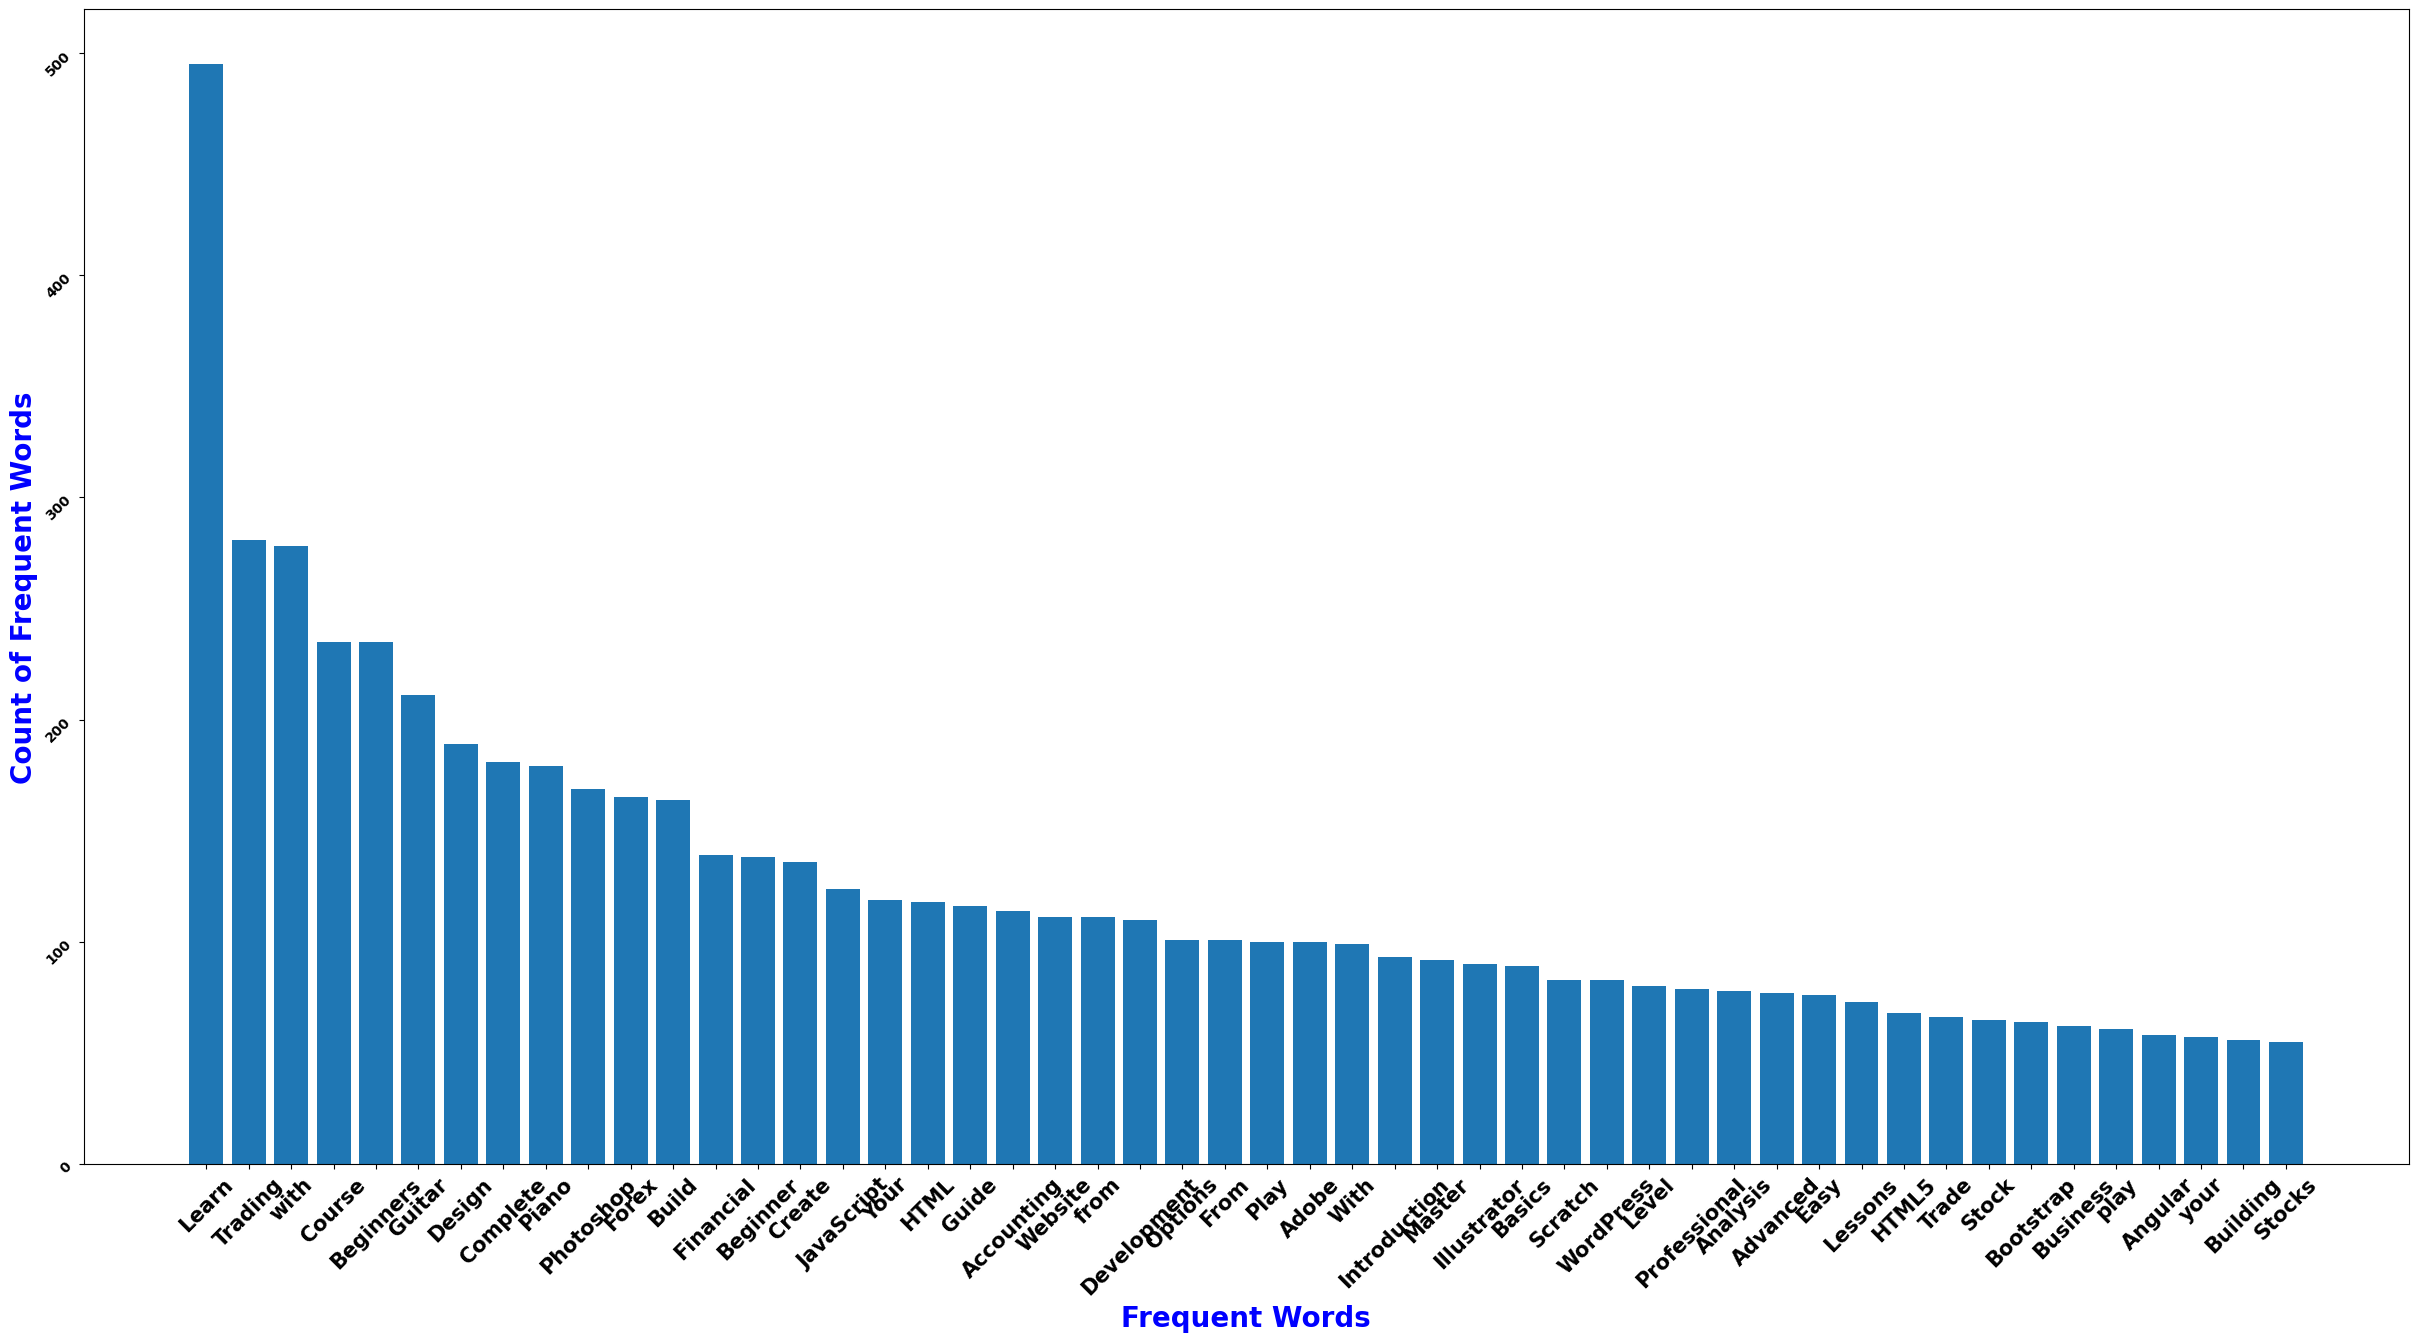

In [100]:
# plot grap of most frequent words
plt.figure(figsize=(30,15))
plt.bar(*zip(*freq_words.items()))
plt.xticks(rotation = 45)

plt.xticks(fontsize = 15,fontweight = 'bold',rotation = 45)
plt.yticks(fontsize = 10,fontweight = 'bold',rotation = 45)
plt.xlabel('Frequent Words',fontsize = 20,fontweight = 'bold',
           color = 'blue')
plt.ylabel('Count of Frequent Words',fontsize = 20,fontweight = 'bold',
           color = 'blue')

plt.show()

### Tokenization

In [105]:
from rake_nltk import Rake
rake = Rake()

all_words = " ".join(all_tokens)

rake.extract_keywords_from_text(all_words)

In [106]:
rake.get_ranked_phrases_with_scores()

[(38953.504957855024,
  'child creative abilities piano lessons french horn solos learn perform three pieces bluegrass guitar essentials webisodes clarinet lessons beginners play music harmonica using notes learn easy tunes learn piano online quiet solace piano solo bluegrass guitar essentials webisodes blues shuffle guitarist guide learn piano online ambiance piano solo piano lessons beginners theory practice modes guitar learn play trumpet violin beginners beginner acoustic guitar lessons aprendiendo piano tocando piezas populares curso bateria explorando diferentes divises escalas pentatnicas para guitarristas brass master class enseando msica mejora clases instrumento ukelele exprs aprende tocar menos curso guitarra para principiantes mundharmonika spielen mein schnstes hobby aprende acorden odo tcnica nivel intermedio prsentation banjo tnor aprende tocar acorden botones aprendiendo piano lectura piezas clsicas pedais efeito para contrabaixo mantenimiento octavacin para guitarras e